In [1]:
!cp -r /content/drive/MyDrive/Lenguaje/Proyecto/Modules Modules
!pip install top2vec[sentence_transformers]

     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 24.1 MB 1.7 MB/s 
     |████████████████████████████████| 5.2 MB 35.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 6.9 MB/s 
     |████████████████████████████████| 1.1 MB 37.6 MB/s 
     |████████████████████████████████| 4.2 MB 42.9 MB/s 
     |████████████████████████████████| 1.2 MB 44.5 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 6.6 MB 31.6 MB/s 
     |████████████████████████████████| 596 kB 53.3 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342135 sha256=97704352ca68749e2511f116f1bd1d346d63e19d3f7c2714768930a65ae156fc
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-le

In [1]:
from Modules.params import get_params
from top2vec import Top2Vec
from os.path import join

In [2]:
params = get_params()
filename = join(params["path models"],
                params["tripadvisor model"])
model = Top2Vec.load(filename)

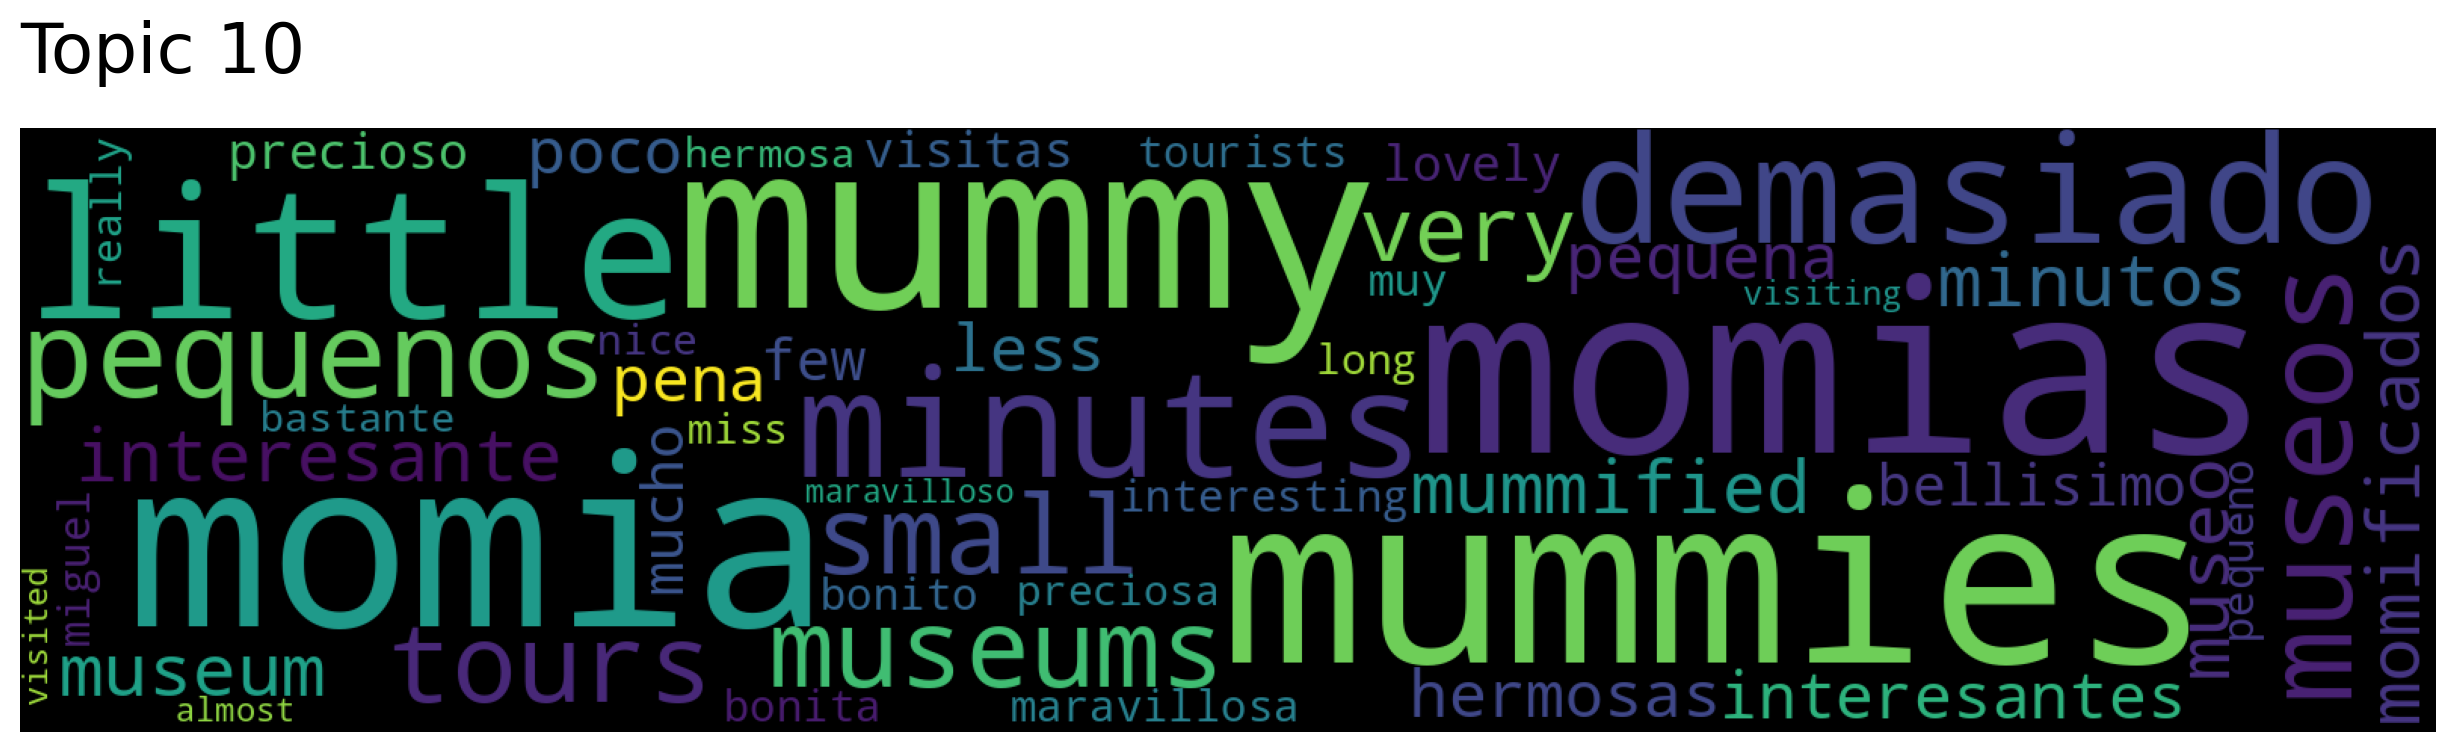

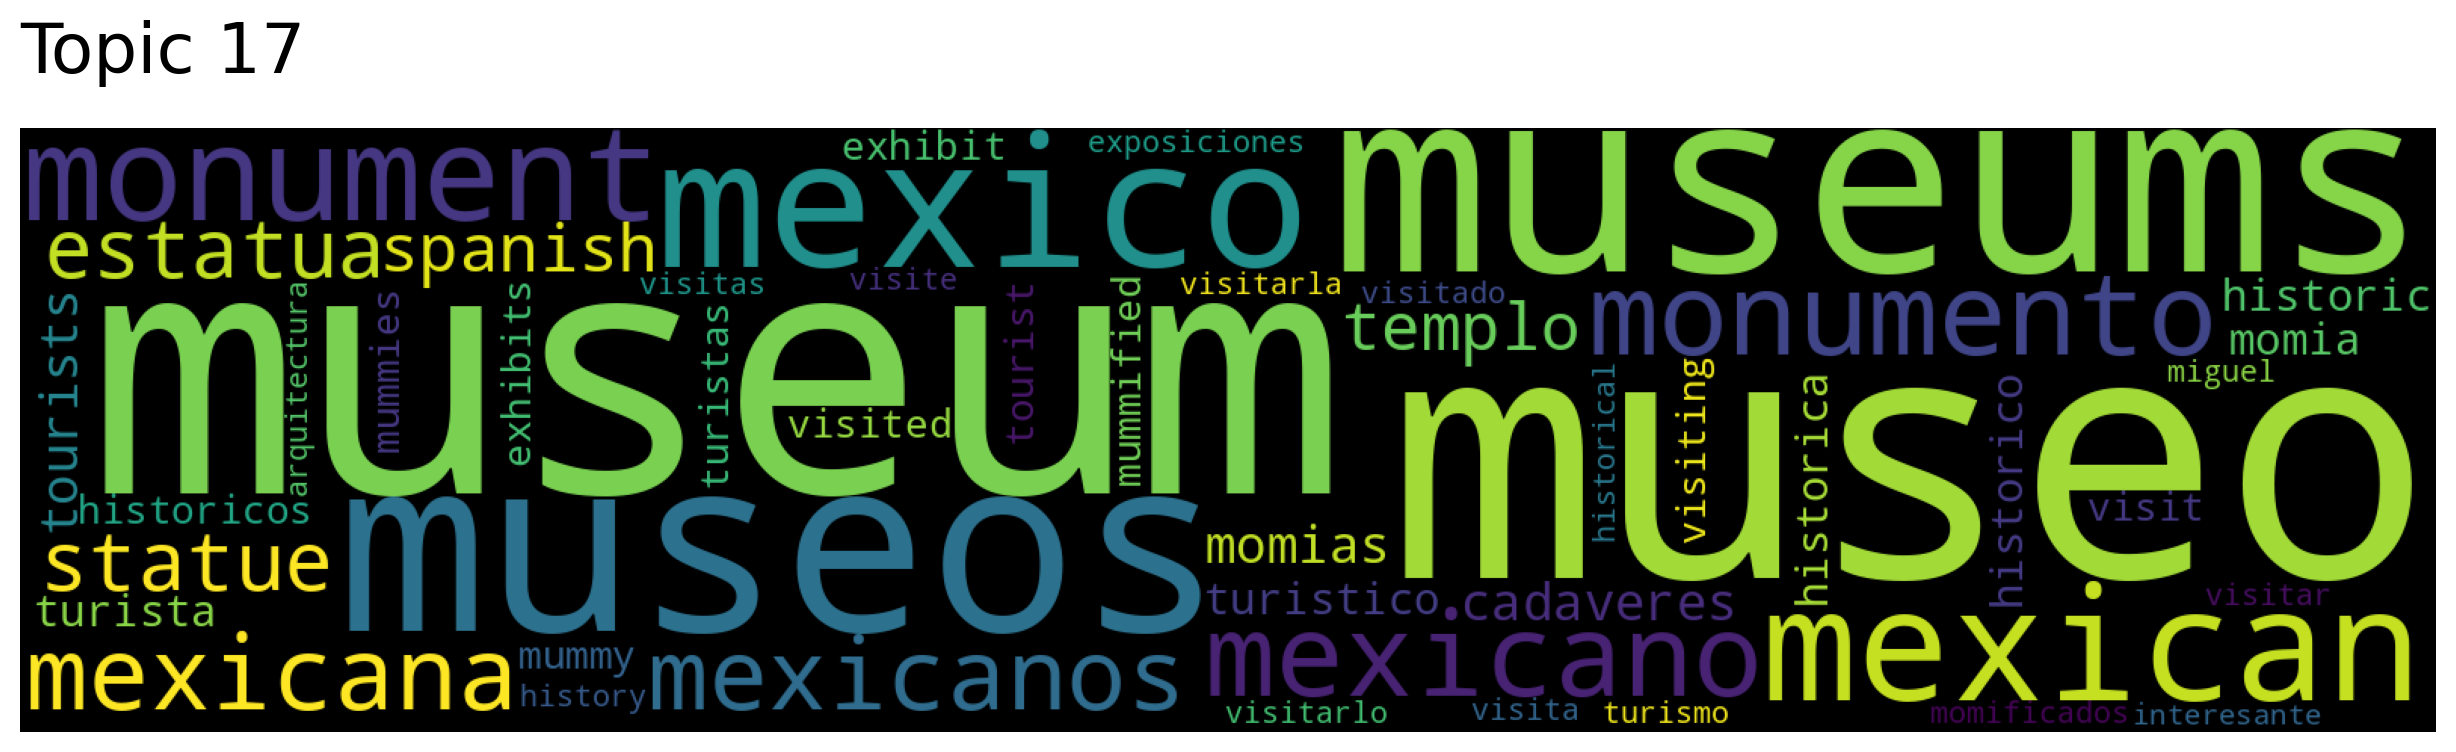

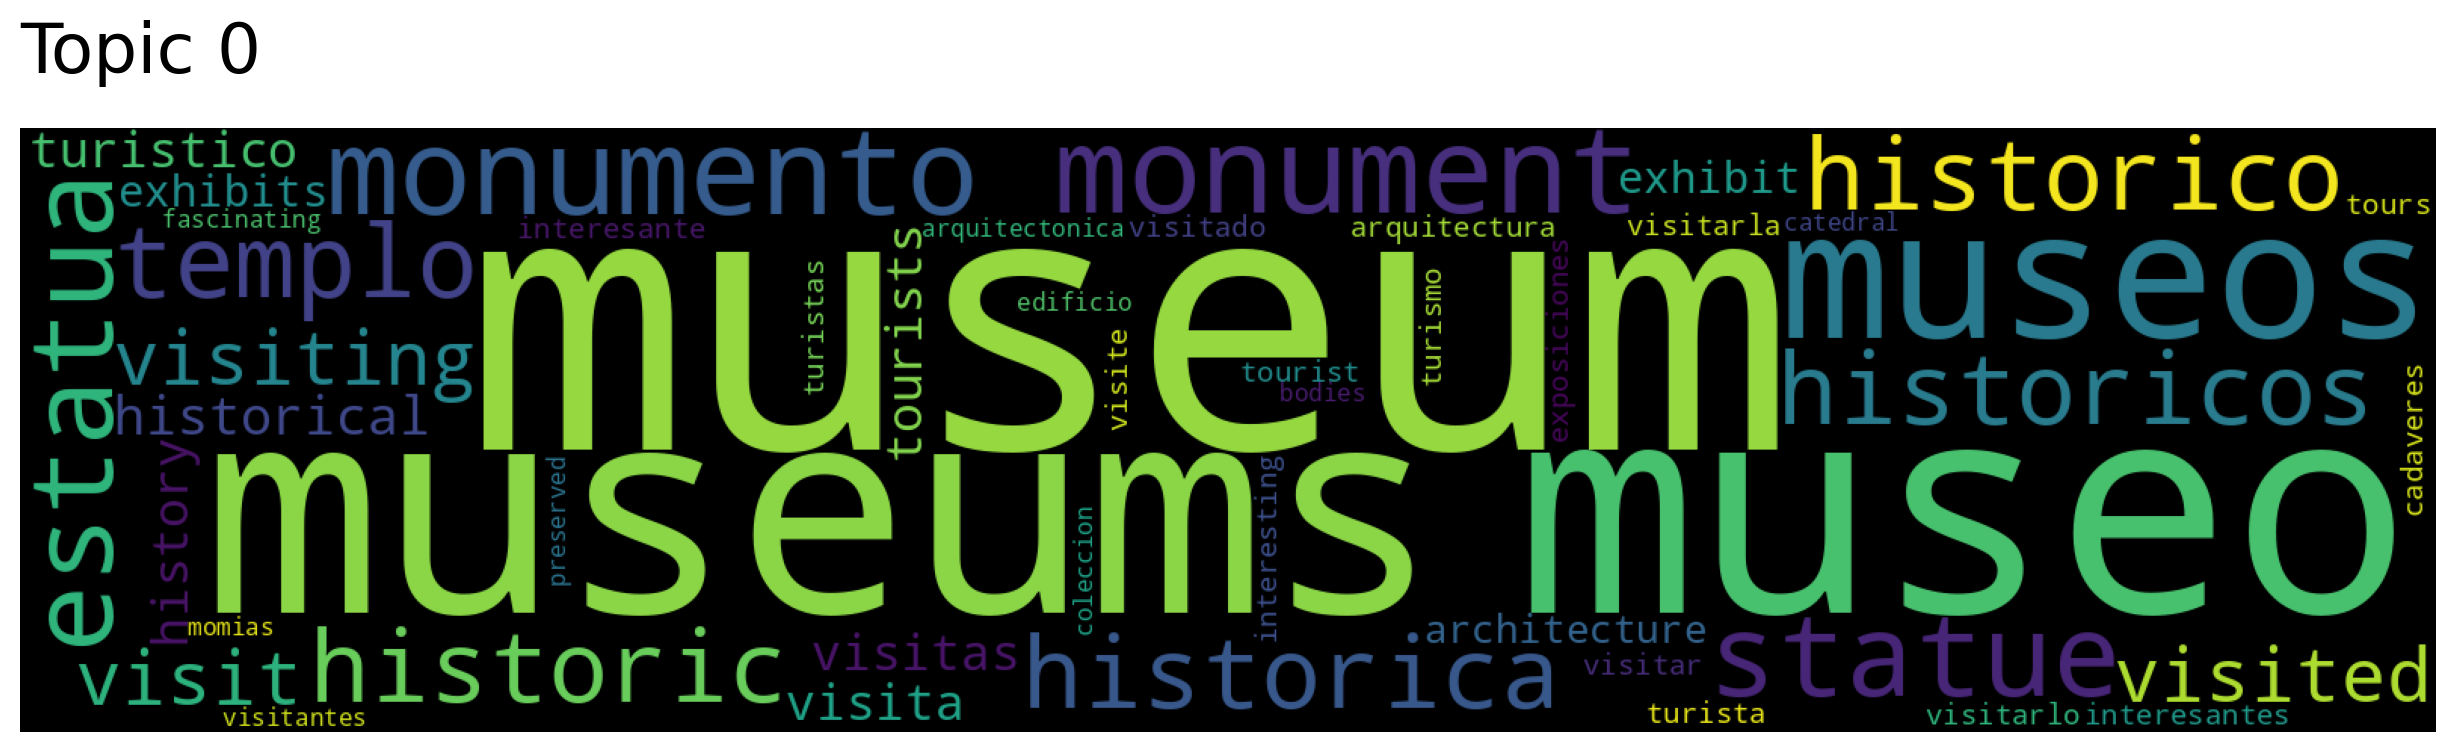

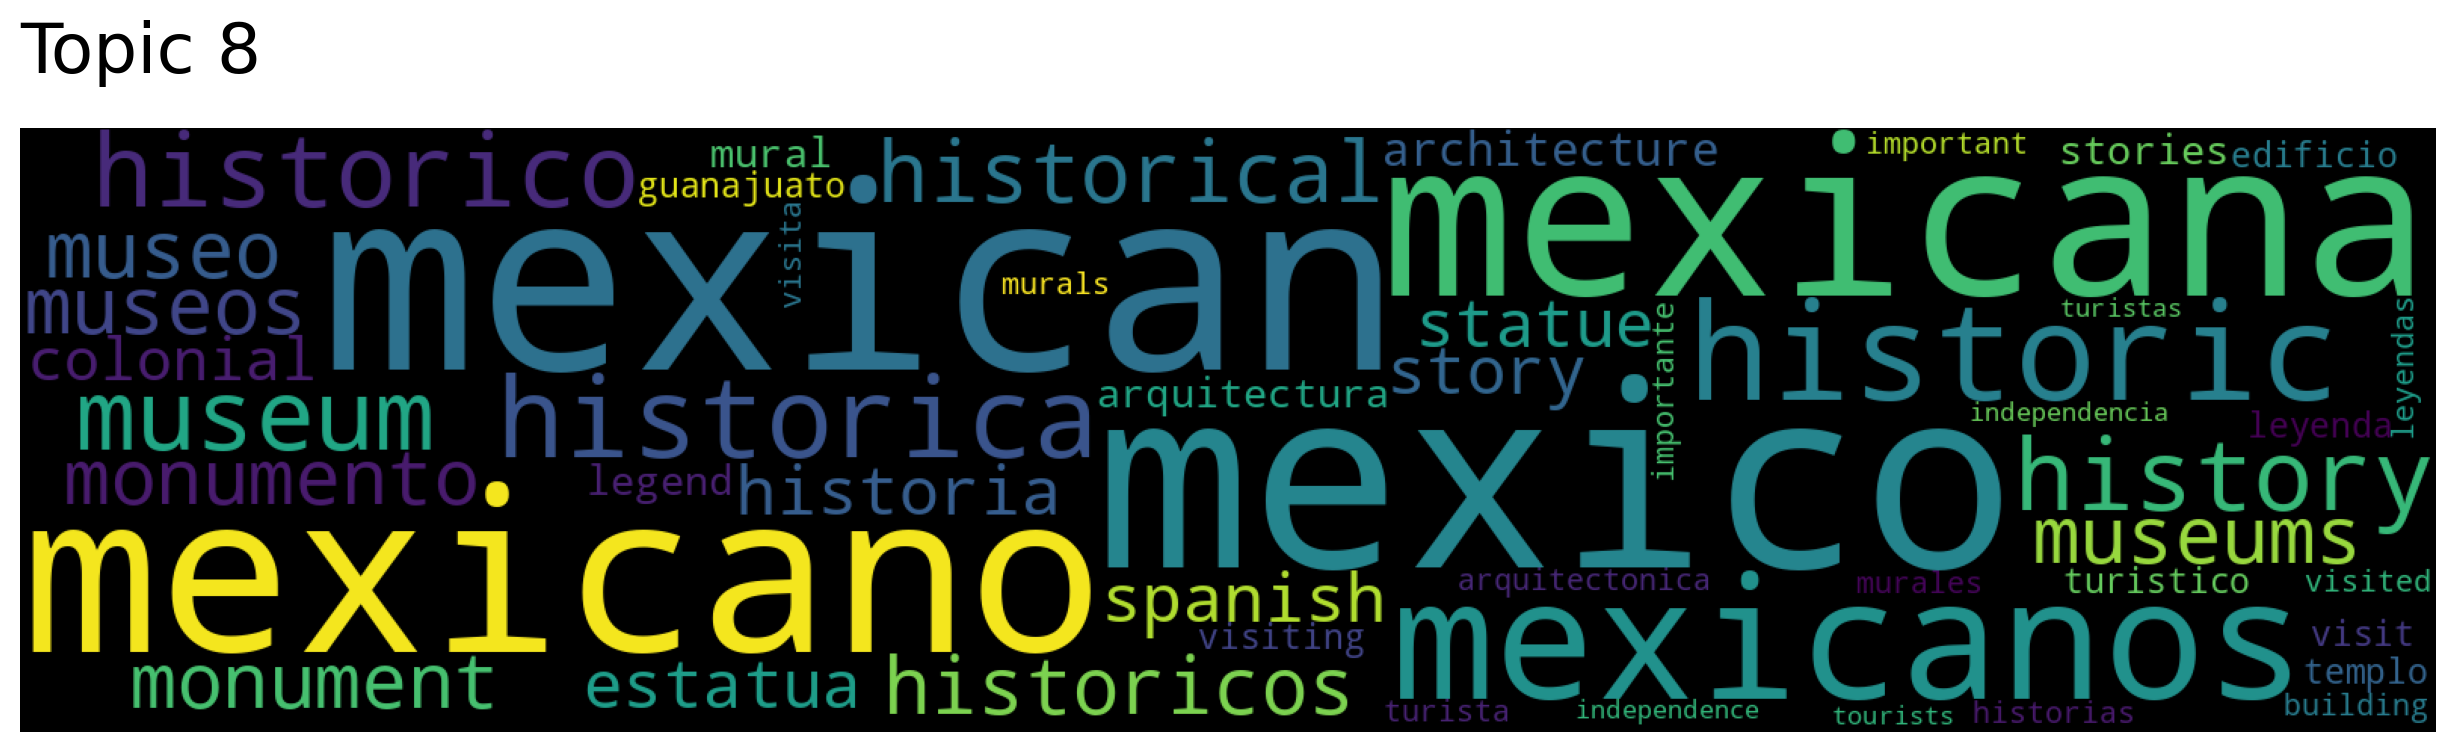

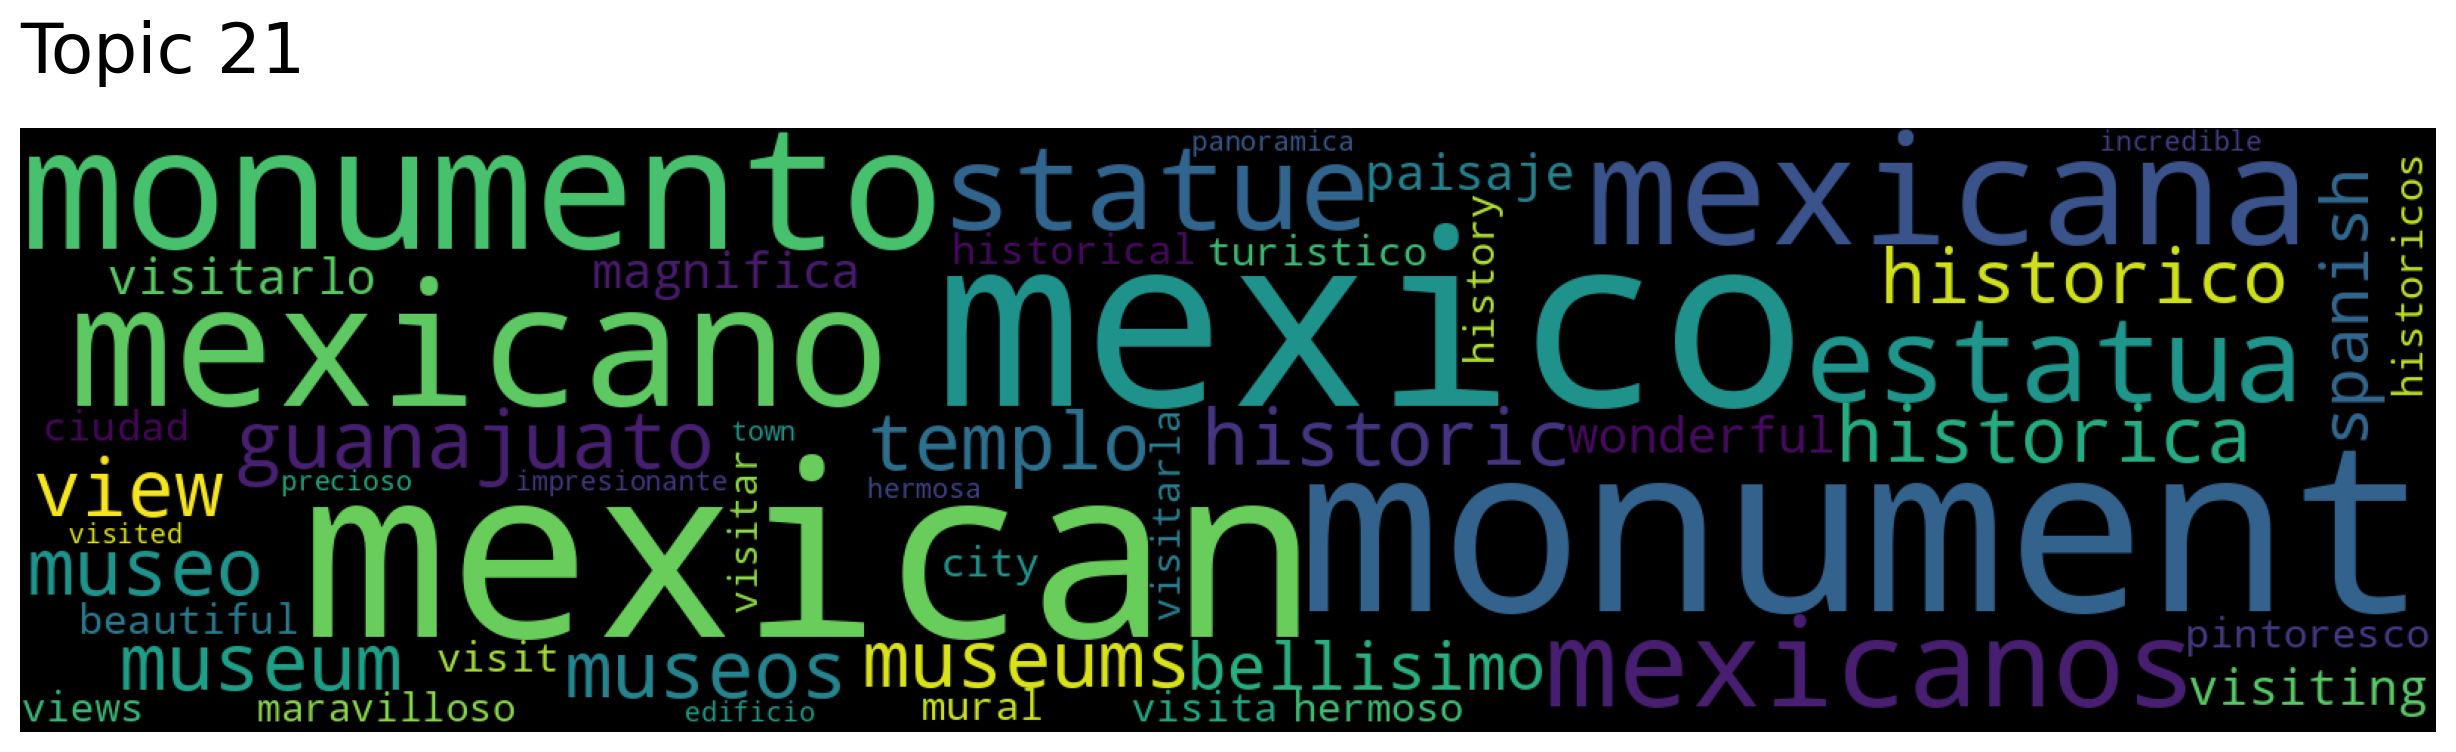

In [4]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["momias"], 
                                                                         num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [5]:
model.topic_words[3]

array(['romantico', 'romantic', 'romantica', 'kiss', 'story', 'historia',
       'enamorados', 'stories', 'historic', 'legend', 'history',
       'historical', 'historica', 'historico', 'historias', 'parejas',
       'historicos', 'leyenda', 'leyendas', 'lovely', 'couple', 'love',
       'pareja', 'amor', 'bellisimo', 'beautiful', 'hermoso', 'hermosa',
       'hermosas', 'street', 'wonderful', 'hermosos', 'location',
       'preciosa', 'romeo', 'gorgeous', 'precioso', 'maravillosa',
       'bonita', 'maravilloso', 'local', 'ubicacion', 'bonito', 'place',
       'loved', 'streets', 'linda', 'encanto', 'places', 'lindo'],
      dtype='<U14')

In [9]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, 
                                                                           num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 730, Score: 0.7672157287597656
-----------
Romantic Going to the Alley of the Kiss can be a bit crowdy. Still it's worth the visit when you go in couples. Listening to the story is very inspiring, and it's absolutely mandatory to take the picture on the third step with your lover.
-----------

Document: 1249, Score: 0.7644165754318237
-----------
Don't forget to follow the tradition ;) When you visit this place, you have to give a big romantic kiss to your couple, thats a must according to local tradition. There is a legend about two lovers that give the name to the place, don't miss the narrative from locals.
-----------

Document: 1055, Score: 0.748102068901062
-----------
Not that different from anywhere else Wandering round this beautiful town is a joy there are lots of narrow streets. There is a touristy legend about kissing on this one but it's not any more delightful than the other streets. You should need an excuse to kiss your partner in a narrow alleyway if your tha

In [10]:
information = model.search_documents_by_keywords(keywords=["iglesia",                                                                                 "museum"],
                                                 num_docs=5)
documents, document_scores, document_ids = information
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 253, Score: 0.44893611821444956
-----------
Genial el museo que está a un lado Las iglesia de Real de minas son hermosas por fuera, pero por dentro, a mi me han dejado mucho que desear. Cuando más, son majestuosas en tamaño. Pero esta iglesia en particular tiene un pequeño museo a un lado. Ostenta un retablo perfectamente limpio y con una iluminación exacta.
-----------

Document: 5455, Score: 0.417780190842345
-----------
Must see at least once in your life… The Mummies Museum is pretty interesting. It has quite a collection of different size and ages of mummies. Its kind of eerie and sad but fascinating all at the same time. The exhibit is a good size with a lot to look at and read. Its not to creepy for children or people who don't like scary things its more interesting. The story of the mummies themselves is pretty sad basically most of the people were buried on a churches property because they couldn't pay for there own burial when the church was closed or moved someone 

In [11]:
words, word_scores = model.similar_words(keywords=["kiss"],
                                         keywords_neg=[], 
                                         num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

besos 0.7512734410356816
amor 0.6996048033341724
enamorados 0.6895244105566753
love 0.6472035132105216
pie 0.6389837099526994
pude 0.6353359106940097
beso 0.6287266832929697
pasa 0.6277470544783712
sus 0.6232088519295013
escalon 0.622750730848503
se 0.6218296719338416
callejon 0.620671414029436
pipila 0.618695309794197
lleva 0.6169227494266525
podras 0.6148611144494869
ser 0.6145343826448879
loved 0.6066446013162718
bello 0.6057555223994721
joya 0.6048243275169292
tal 0.6044469396198939
